<a href="https://colab.research.google.com/github/khayes39/firstrepo/blob/main/HW3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/ML/Data_sets/diabetes.csv'
diabetes = pd.DataFrame(pd.read_csv(file_path))


print(diabetes.shape)

diabetes.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#splitting the data set into train and test sets 2 for x 2 for y
from sklearn.model_selection import train_test_split

x_vars = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]

X_vals = diabetes[x_vars]
Y_vals = diabetes["Outcome"]

np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(X_vals, Y_vals, train_size = 0.8, test_size = 0.2, random_state = 100)

#separating the data into x vals and y vals

# x_vars_train = df_train[x_vars]
# x_vars_test = df_test[x_vars]

# y_train = df_train["Outcome"]
# y_test = df_test["Outcome"]
x_test.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
173,1,79,60,42,48,43.5,0.678,23
253,0,86,68,32,0,35.8,0.238,25
207,5,162,104,0,0,37.7,0.151,52
737,8,65,72,23,0,32.0,0.600,42
191,9,123,70,44,94,33.1,0.374,40


In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# df_train_2 = df_train
# df_test_2 = df_test

x_train_std = x_train
x_test_std = x_test

x_train_std[x_vars] = scaler.fit_transform(x_train[x_vars])
x_test_std[x_vars] = scaler.transform(x_test[x_vars])
# df_test_2[x_vars] = scaler.fit_transform(df_test[x_vars])
# x_train = df_train_2[x_vars]
# x_test = df_test_2[x_vars]

x_test_std.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
173,-0.832490,-1.309256,-0.455185,1.333791,-0.260318,1.448576,0.622732,-0.886423
253,-1.134766,-1.091148,-0.044180,0.716416,-0.668734,0.491857,-0.677411,-0.713339
207,0.376614,1.276880,1.805342,-1.259183,-0.668734,0.727930,-0.934485,1.623301
737,1.283443,-1.745472,0.161323,0.160779,-0.668734,0.019710,0.392252,0.757879
191,1.585719,0.061708,0.058572,1.457266,0.131081,0.156384,-0.275549,0.584794


In [ ]:
#logistic regression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


C = [10, 1, .1, .001]

for c in C: #testing various C values for the model
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(x_train_std, y_train)
    print('C:', c)
    print('Training accuracy:', clf.score(x_train_std, y_train))
    print('Test accuracy:', clf.score(x_test_std, y_test))
    print('')

C: 10
Training accuracy: 0.7931596091205212
Test accuracy: 0.7337662337662337

C: 1
Training accuracy: 0.7931596091205212
Test accuracy: 0.7337662337662337

C: 0.1
Training accuracy: 0.7866449511400652
Test accuracy: 0.7337662337662337

C: 0.001
Training accuracy: 0.7703583061889251
Test accuracy: 0.6818181818181818



In [ ]:

model = LogisticRegression(penalty='l1', C=0.5, solver='liblinear')   #changing l1 to l2 does not make a noticeable difference


In [ ]:
# Constructing a confusion matrix
model.fit(x_train_std, y_train) #using the LogisticRegression function with liblinear solver as a model, i fit this model to the x_train_std and y_train
predicted = model.predict(x_test_std)
matrix = confusion_matrix(y_test, predicted)
print(matrix)
report = classification_report(y_test, predicted)
print(report)

[[85 16]
 [26 27]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       101
           1       0.63      0.51      0.56        53

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154



Text(0.5, 427.9555555555555, 'Predicted label')

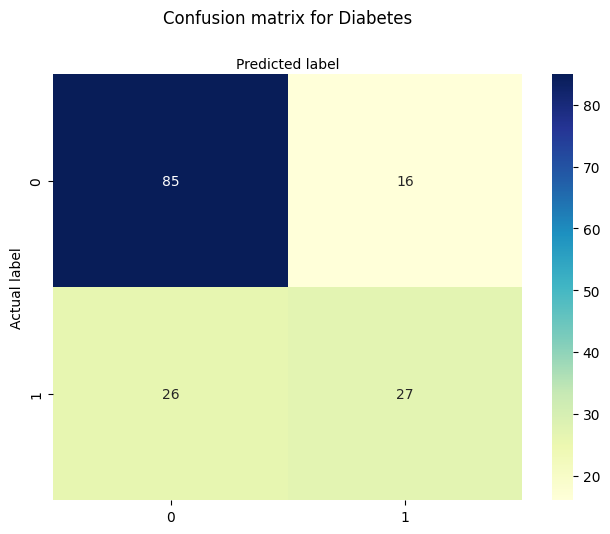

In [ ]:
import seaborn as sns
from matplotlib.colors import ListedColormap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Diabetes', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')